# Test the extracted BIU R wrapper

In [1]:
import biur
import matplotlib.pylab as plt
import pandas as pd

In [2]:
R = biur.R()

## Push some data

In [3]:
R.push(n=5000, mean=10, var=6, question="How many apples do you eat per day?")

## Run some commands

In [4]:
R("""
    dist <- rnorm(n, mean, var)
    print(mean(dist))
""", get=False)

[1] 10.02596


## Get some data

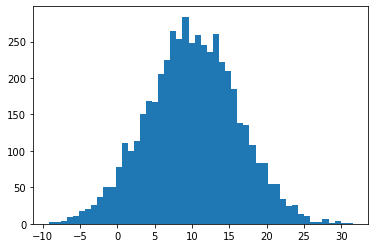

In [5]:
dist = R.get("dist")
dist_alt = R("dist", get=True) # the get parameter is True by default
_ = plt.hist(dist, bins=50)

## Do it all at the same time

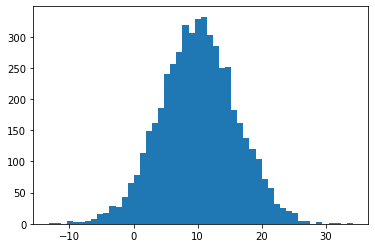

In [6]:
dist = R("""rnorm(n, mean, var)""",
         push=dict(n=5000, mean=10, var=6, question="How many apples do you eat per day?"))
_ = plt.hist(dist, bins=50)

## Dataframes also work as expected

In [7]:
df  = pd.DataFrame(dist.reshape(500,10), columns=["C%d" % (i+1) for i in range(10)])
df2 = R("""df*2""", push=dict(df=df))
df2.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19.483522,20.526126,20.795463,19.830822,19.966503,21.357578,19.955829,19.687476,19.659160,19.973759
std,12.335198,11.628605,12.231484,11.886862,11.419686,11.657351,11.500650,11.501253,12.668158,12.182259
min,-23.604096,-19.317664,-13.852837,-18.492268,-14.829335,-26.297393,-10.214214,-16.114489,-26.525327,-12.705910
25%,10.769325,13.167645,12.920961,12.197403,12.409445,14.051357,12.018763,11.624662,11.547831,11.355280
50%,19.751316,20.304215,20.499023,19.934705,19.236623,21.403425,19.947370,19.999798,20.293528,20.140320
75%,27.447524,28.246787,28.522705,28.167066,28.447994,28.833786,27.165384,27.484840,28.118585,28.075203
max,58.805833,52.976081,58.818565,57.953478,63.160386,68.383550,61.659418,53.538999,52.457741,54.278089


## Some additional stuff

### Dates

In [10]:
from datetime import datetime
R("""print(today)""", push=dict(today=datetime.today()), get=False)

[1] "2021-09-27 14:14:03 CEST"


### Dictionaries

# Note that individual numbers do not exist in R (everything is a vector) so it is impossible to transform this back perfectly.

In [11]:
R.push(mydict={"A":10, "B":20, "C":40})
R("""
    mydict$D <- 60
    mydict""")

{'A': [10], 'B': [20], 'C': [40], 'D': [60.0]}